No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

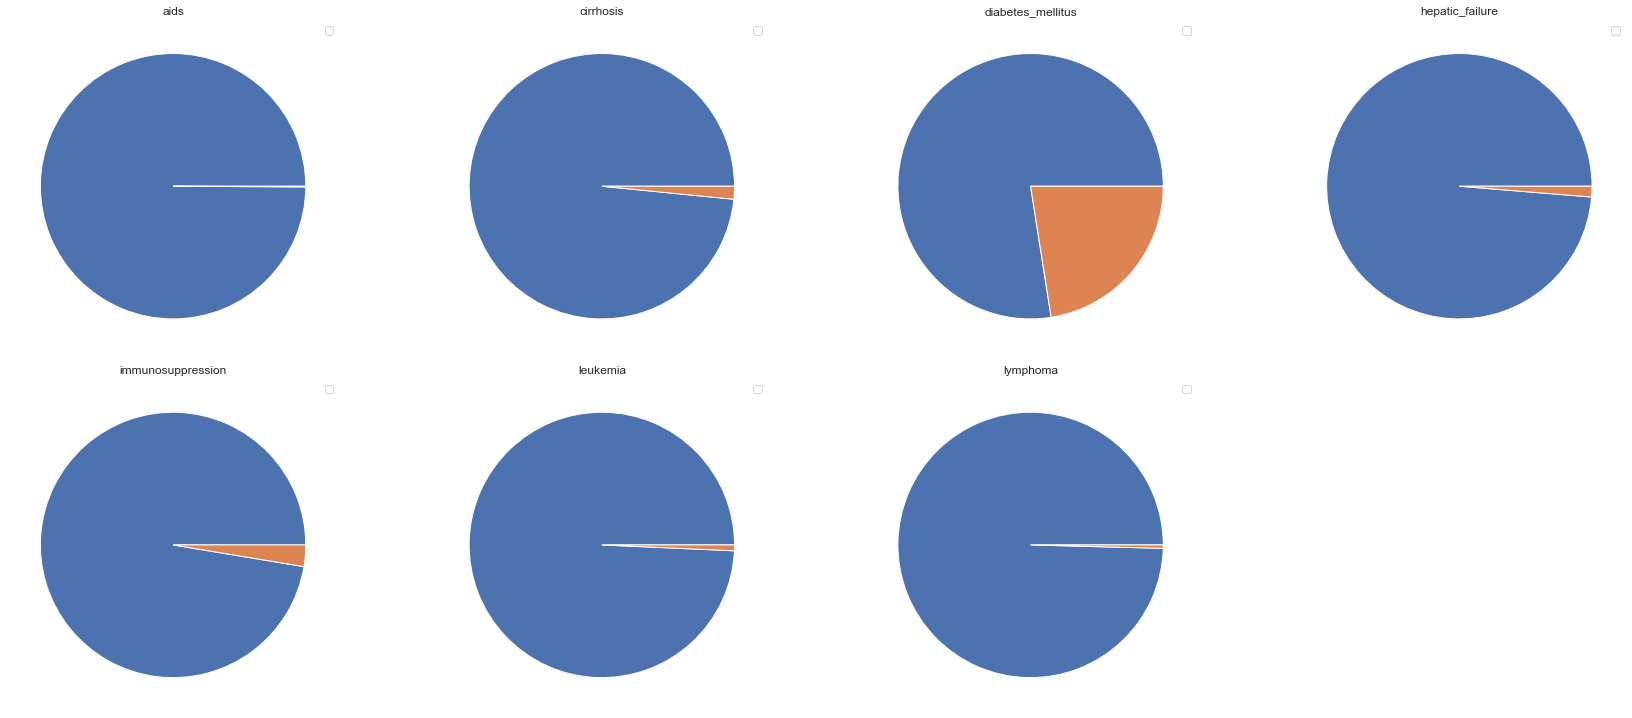

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_ = pd.read_csv("training_v2.csv")
df_.head()

columns_feature_select = [
    "age",
    "bmi",
    "height",
    "pre_icu_los_days",
    "weight",
    "apache_2_diagnosis",
    "apache_3j_diagnosis",
    "heart_rate_apache",
    "map_apache",
    "resprate_apache",
    "temp_apache",
    "d1_diasbp_max",
    "d1_diasbp_min",
    "d1_heartrate_max",
    "d1_heartrate_min",
    "d1_mbp_max",
    "d1_mbp_min",
    "d1_resprate_max",
    "d1_resprate_min",
    "d1_spo2_min",
    "d1_sysbp_min",
    "d1_sysbp_noninvasive_max",
    "d1_temp_max",
    "d1_temp_min",
    "h1_diasbp_max",
    "h1_diasbp_min",
    "h1_heartrate_max",
    "h1_heartrate_min",
    "h1_mbp_max",
    "h1_mbp_noninvasive_min",
    "h1_resprate_max",
    "h1_resprate_min",
    "h1_spo2_max",
    "h1_spo2_min",
    "h1_sysbp_max",
    "h1_sysbp_noninvasive_min",
    "d1_bun_min",
    "d1_calcium_max",
    "d1_calcium_min",
    "d1_creatinine_min",
    "d1_glucose_max",
    "d1_glucose_min",
    "d1_hematocrit_min",
    "d1_platelets_max",
    "d1_potassium_max",
    "d1_potassium_min",
    "d1_sodium_max",
    "d1_sodium_min",
    "d1_wbc_max",
    "apache_4a_hospital_death_prob",
    "apache_4a_icu_death_prob",
]

columns_categorical = [
    "icu_type",
    "apache_3j_bodysystem",
]

columns_gcs = [
    "gcs_eyes_apache",
    "gcs_motor_apache",
    "gcs_verbal_apache",
    "gcs_unable_apache",
]
extra_columns = [
    "aids",
    "cirrhosis",
    "diabetes_mellitus",
    "hepatic_failure",
    "immunosuppression",
    "leukemia",
    "lymphoma",
]

output = ["hospital_death"]

df_ = df_[columns_feature_select + columns_gcs + extra_columns+columns_categorical+output]

df_["gcs"] = df_[columns_gcs].sum(axis=1)
df_ = df_.drop(columns_gcs, axis=1)


plt.figure(figsize=(24, 50))
plt.title("VGFBGF")
sns.set()
sns.set_theme(style="white")
try:
    for i, col in enumerate(extra_columns):
        plt.subplot(10, 4, i + 1)
        plt.pie(df_[col].value_counts())
        plt.legend()
        plt.title(col)
        plt.tight_layout()
except Exception as e:
    print(col, e)
plt.show()

In [9]:
df_["severe_sickness"] = df_[extra_columns].astype(bool).any(axis=1).astype(int)
df_ = df_.drop(extra_columns, axis=1)

remove_cols = [
    "height",
    "weight",
    "apache_4a_hospital_death_prob",
    "apache_4a_icu_death_prob",
]

df_ = df_.drop(remove_cols, axis=1)


In [10]:
df_.dtypes

age                         float64
bmi                         float64
pre_icu_los_days            float64
apache_2_diagnosis          float64
apache_3j_diagnosis         float64
heart_rate_apache           float64
map_apache                  float64
resprate_apache             float64
temp_apache                 float64
d1_diasbp_max               float64
d1_diasbp_min               float64
d1_heartrate_max            float64
d1_heartrate_min            float64
d1_mbp_max                  float64
d1_mbp_min                  float64
d1_resprate_max             float64
d1_resprate_min             float64
d1_spo2_min                 float64
d1_sysbp_min                float64
d1_sysbp_noninvasive_max    float64
d1_temp_max                 float64
d1_temp_min                 float64
h1_diasbp_max               float64
h1_diasbp_min               float64
h1_heartrate_max            float64
h1_heartrate_min            float64
h1_mbp_max                  float64
h1_mbp_noninvasive_min      

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


df_ = df_.dropna()
dummy = pd.get_dummies(df_.apache_3j_bodysystem)



df = pd.merge(
    left=df_.drop(["apache_3j_bodysystem"], axis=1),
    right=dummy,
    left_index=True,
    right_index=True,
)

df

,age,bmi,pre_icu_los_days,apache_2_diagnosis,apache_3j_diagnosis,heart_rate_apache,map_apache,resprate_apache,temp_apache,d1_diasbp_max,...,Gastrointestinal,Genitourinary,Gynecological,Hematological,Metabolic,Musculoskeletal/Skin,Neurological,Respiratory,Sepsis,Trauma
0,68.0,22.730000,0.541667,113.0,502.01,118.0,40.0,36.0,39.3,68.0,...,0,0,0,0,0,0,0,0,1,0
1,77.0,27.420000,0.927778,108.0,203.01,120.0,46.0,33.0,35.1,95.0,...,0,0,0,0,0,0,0,1,0,0
5,67.0,27.560000,0.000694,301.0,403.01,113.0,130.0,35.0,36.6,100.0,...,0,0,0,0,0,0,1,0,0,0
9,50.0,25.710000,0.060417,112.0,107.01,94.0,58.0,46.0,36.3,83.0,...,0,0,0,0,0,0,0,0,0,0
10,72.0,28.257052,0.004861,303.0,1304.08,101.0,72.0,15.0,36.8,72.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91698,47.0,51.439842,0.033333,304.0,1406.01,137.0,66.0,8.0,36.5,83.0,...,1,0,0,0,0,0,0,0,0,0
91706,54.0,19.770448,0.025694,109.0,108.01,55.0,62.0,12.0,36.6,102.0,...,0,0,0,0,0,0,0,0,0,0
91708,75.0,23.060250,0.298611,113.0,501.06,115.0,48.0,9.0,36.6,104.0,...,0,0,0,0,0,0,0,0,1,0
91709,56.0,47.179671,0.120139,113.0,501.05,100.0,62.0,33.0,37.4,73.0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
mapper_ = {icu_: k for k, icu_ in enumerate(df.icu_type.unique())}
df["icu_type"] = df["icu_type"].replace(mapper_).astype(int)

In [7]:
df.to_csv("preprocess_data_.csv")

In [13]:
X, y, t = (
    df.drop(output + ["icu_type"], axis=1).to_numpy(dtype="float32"),
    df[output].to_numpy(dtype="int").reshape(-1, 1),
    df.icu_type.to_numpy(dtype="int32").reshape(-1, 1),
)

In [14]:
from tarNET import tarNET
import tensorflow as tf

normalizer_layer = tf.keras.layers.Normalization(axis=None)
normalizer_layer.adapt(X)
scaler = normalizer_layer


2022-07-21 14:18:29.309842: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
DATASET_SIZE = len(df)

batch_size = 64

train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.2 * DATASET_SIZE)
test_size = int(0.1 * DATASET_SIZE)

dataset = tf.data.Dataset.zip(
    (tf.data.Dataset.from_tensor_slices((X, t)), tf.data.Dataset.from_tensor_slices(y))
).shuffle(buffer_size=DATASET_SIZE, reshuffle_each_iteration=False)#batch(64)

train_dataset = dataset.take(train_size).batch(batch_size)
test_dataset = dataset.skip(train_size)
val_dataset = test_dataset.take(val_size).batch(batch_size)
test_dataset = test_dataset.skip(val_size)

In [1]:
val_dataset

NameError: name 'val_dataset' is not defined

In [16]:
import numpy as np

neg, pos = np.bincount(np.concatenate([y for _, y in train_dataset]).reshape(-1).astype("int"))

initial_bias = tf.keras.initializers.Constant(np.log([pos/neg]))
print(f"{pos/neg*100} percent of the samples are positive")

9.64854294056079 percent of the samples are positive


In [17]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * ((neg+pos) / 2.0)
weight_for_1 = (1 / pos) * ((neg+pos) / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.55
Weight for class 1: 5.68


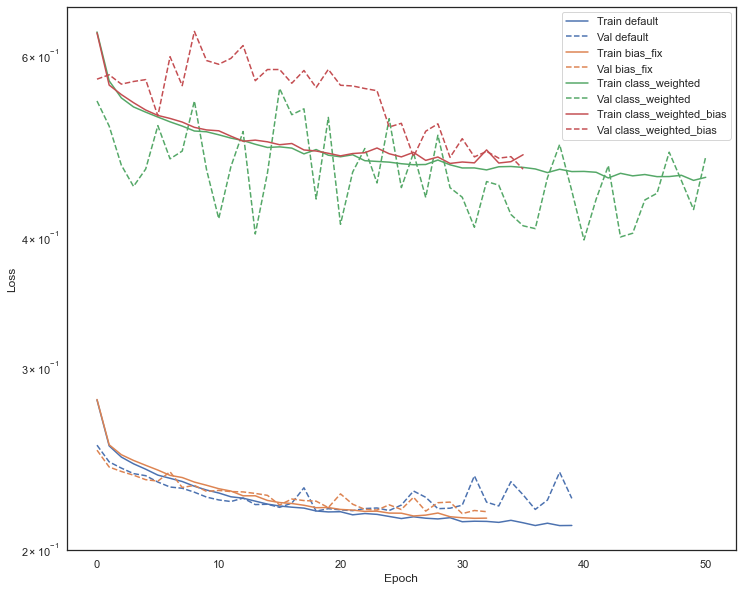

In [24]:
EPOCHS = 100
BATCH_SIZE = 2048

metrics = [
    tf.keras.metrics.TruePositives(name="tp"),
    tf.keras.metrics.FalsePositives(name="fp"),
    tf.keras.metrics.TrueNegatives(name="tn"),
    tf.keras.metrics.FalseNegatives(name="fn"),
    tf.keras.metrics.BinaryAccuracy(name="accuracy"),
    tf.keras.metrics.Precision(name="precision"),
    tf.keras.metrics.Recall(name="recall"),
    tf.keras.metrics.AUC(name="auc"),
    tf.keras.metrics.AUC(name="prc", curve="PR"),
]

model = tarNET(
    output_dim=1,
    n_treatments=len(mapper_),
    normalizer_layer=normalizer_layer,
    scaler=scaler,
    phi_layers=10,
)

model_weighted = tarNET(
    output_dim=1,
    n_treatments=len(mapper_),
    normalizer_layer=normalizer_layer,
    scaler=scaler,
    phi_layers=10,
)
model_bias = tarNET(
    output_dim=1,
    n_treatments=len(mapper_),
    normalizer_layer=normalizer_layer,
    scaler=scaler,
    output_bias=initial_bias,
    phi_layers=10,
)

model_bias_weighted = tarNET(
    output_dim=1,
    n_treatments=len(mapper_),
    normalizer_layer=normalizer_layer,
    scaler=scaler,
    output_bias=initial_bias,
    phi_layers=10,
)

models = {
    "default": model,
    "bias_fix": model_bias,
    "class_weighted": model_weighted,
    "class_weighted_bias": model_bias_weighted,
}

callbacks = [
    tf.keras.callbacks.TerminateOnNaN(),
    tf.keras.callbacks.EarlyStopping(
        monitor="val_prc", verbose=1, patience=10, mode="max", restore_best_weights=True
    ),
]

for model in models.values():
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=metrics,
    )


history_ = {
    key: model.fit(
        train_dataset,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        callbacks=callbacks,
        validation_data=val_dataset,
        class_weight=class_weight if "weighted" in key else None,
    )
    for key, model in models.items()
}


from IPython.display import clear_output

clear_output()
import matplotlib as mpl

mpl.rcParams["figure.figsize"] = (12, 10)
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]


def plot_loss(history_):
    # Use a log scale on y-axis to show the wide range of values.
    for n, (label, history) in enumerate(history_.items()):
        plt.semilogy(
            history.epoch,
            history.history["loss"],
            color=colors[n],
            label="Train " + label,
        )
        plt.semilogy(
            history.epoch,
            history.history["val_loss"],
            color=colors[n],
            label="Val " + label,
            linestyle="--",
        )
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
    plt.legend()


plot_loss(history_)
# plot_loss(careful_bias_history, "Careful Bias", 1)

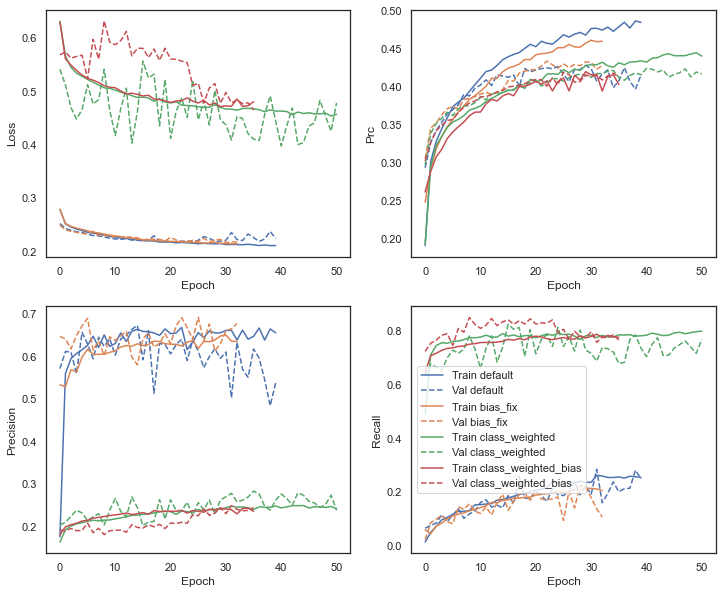

In [25]:
def plot_metrics(history_):

    metrics = ["loss", "prc", "precision", "recall"]
    for color_index, (model_name, history) in enumerate(history_.items()):
        for n, metric in enumerate(metrics):
            name = metric.replace("_", " ").capitalize()
            plt.subplot(2, 2, n + 1)
            plt.plot(
                history.epoch,
                history.history[metric],
                color=colors[color_index],
                label=f"Train {model_name}",
            )
            plt.plot(
                history.epoch,
                history.history["val_" + metric],
                color=colors[color_index],
                linestyle="--",
                label=f"Val {model_name}",
            )
            plt.xlabel("Epoch")
            plt.ylabel(name)
            #if metric == "loss":
            #    plt.ylim([0, plt.ylim()[1]])
            #elif metric == "auc":
            #    plt.ylim([0.8, 1])
            #else:
            #    plt.ylim([0, 1])

        plt.legend()


plot_metrics(history_)

loss :  0.22164607048034668
tp :  100.0
fp :  66.0
tn :  5157.0
fn :  364.0
accuracy :  0.9243889451026917
precision :  0.6024096608161926
recall :  0.21551723778247833
auc :  0.8324854373931885
prc :  0.3837566673755646
loss :  0.21998894214630127
tp :  64.0
fp :  37.0
tn :  5186.0
fn :  400.0
accuracy :  0.9231581091880798
precision :  0.6336633563041687
recall :  0.13793103396892548
auc :  0.8381949663162231
prc :  0.393951416015625
loss :  0.41345131397247314
tp :  312.0
fp :  940.0
tn :  4283.0
fn :  152.0
accuracy :  0.8079831004142761
precision :  0.24920128285884857
recall :  0.6724137663841248
auc :  0.8328738808631897
prc :  0.37476956844329834
loss :  0.5321081876754761
tp :  355.0
fp :  1416.0
tn :  3807.0
fn :  109.0
accuracy :  0.7318445444107056
precision :  0.20045171678066254
recall :  0.7650862336158752
auc :  0.8307825922966003
prc :  0.3631545305252075


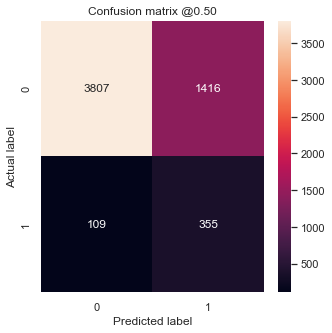

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
      

train_labels=np.concatenate([y for _,y in train_dataset])
test_labels=np.concatenate([y for _,y in test_dataset])

train_predictions_baseline={}
test_predictions_baseline = {}

for key, model_ in models.items():


  train_predictions_baseline[key] = model_.predict(train_dataset, batch_size=BATCH_SIZE)
  test_predictions_baseline[key] = model_.predict(test_dataset, batch_size=BATCH_SIZE)

  
  baseline_results = model_.evaluate(test_dataset,
                                    batch_size=BATCH_SIZE, verbose=0)
  for name, value in zip(model_.metrics_names, baseline_results):
    print(name, ': ', value)



plot_cm(test_labels, test_predictions_baseline["class_weighted_bias"])

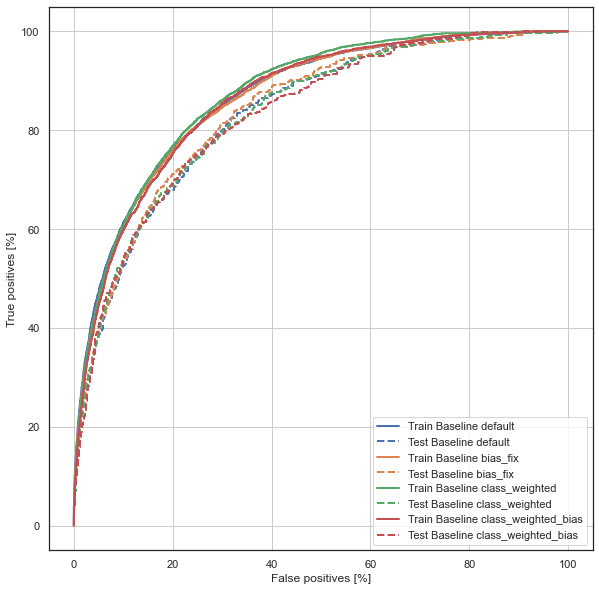

In [32]:
from sklearn.metrics import roc_curve
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = roc_curve(labels, predictions)

    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    #plt.xlim([-0.5,20])
    #plt.ylim([80,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

for index, (key, model_ )in enumerate(models.items()):
    
    plot_roc(f"Train Baseline {key}", train_labels, train_predictions_baseline[key], color=colors[index])
    plot_roc(f"Test Baseline {key}", test_labels, test_predictions_baseline[key], color=colors[index], linestyle='--')


plt.legend(loc='lower right')